#### Ans 1- City Vs Number of times funded

Bangalore 635
Mumbai 449
New Delhi 389
Gurgaon 241
Noida 79


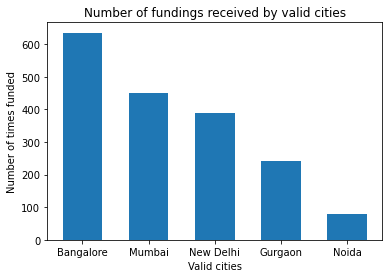

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# getCity function to get the corrected names for the cities

def getCity(city):
    city=str(city)    
    
    if "/" in city:
        indianCity=city.split()[0].capitalize()  
        
        if "/" in indianCity:
            idx=indianCity.index("/")
            
            return indianCity[:idx]
        
        cond=("delhi" in city or "Delhi" in city)
        
        if (indianCity=="delhi" or indianCity=="Delhi" or (indianCity=="new" and cond) or (indianCity=="New" and cond)):
            return "New Delhi"
    
        return indianCity    
    
    if (city=="delhi" or city=="Delhi" or city=="new delhi" or city=="new Delhi" or city=="New delhi" or city=="New Delhi"):
        return "New Delhi"
    
    return city.capitalize()

# getValidCity function to get the valid cities

def getValidCity(city):
    if (city=="Bangalore" or city=="Mumbai" or city=="Gurgaon" or city=="Noida" or city=="New Delhi"):
        return city
    
    return np.nan

# getting the dataframe
    
df=pd.read_csv("startup_funding.csv", skipinitialspace=True)

# dropping the nan city location values and filling the nan amount values with "0"

df["CityLocation"].dropna(inplace=True)
df["AmountInUSD"].fillna("0", inplace=True)

# getting the corrected names for the cities, then getting the valid cities and then dropping the nan city values

df_city=df["CityLocation"].apply(getCity)
df_city=df_city.apply(getValidCity)
df_city.dropna(inplace=True)

# getting the unique cities and their funding count

np_city=np.array(df_city.value_counts().index)
np_count=np.array(df_city.value_counts().values)

# printing the cities and their funding count, in descending order wrt funding count

for i in range(np_city.shape[0]):
    print(np_city[i], np_count[i])
    
# plotting and showing a bar graph between the cities and their funding count

plt.xlabel("Valid cities")
plt.ylabel("Number of times funded")
plt.title("Number of fundings received by valid cities")
    
plt.bar(np_city, np_count, width=0.6)
plt.show()
    

According to the friend's financial restriction to choose a startup location among Bangalore, Mumbai and NCR, the best possible choice according to the number of times a city a has been funded will be Bangalore 

#### Ans 2- Top 5 Investors in Indian startups(a particular investor investing in the same startup multiple times, considered as seperate investments)

Sequoia Capital 64
Accel Partners 52
Kalaari Capital 44
SAIF Partners 41
Indian Angel Network 40


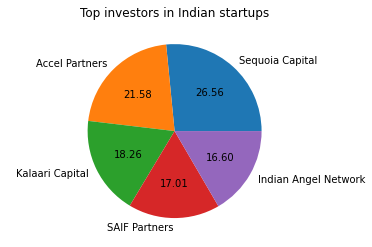

In [13]:
# getInvestorNameAndCount function which returns a tuple with the unique investors and their investment count arrays

def getInvestorNameAndCount():
    investor_vs_count={}
    
    for i in range(df_investors.shape[0]):        
        names=df_investors.iloc[i]
        
        if ("undisclosed" in names or "Undisclosed" in names):
            continue
            
        names=names.split(",")
        
        for name in names:                 
            name=name.lstrip()
            name=name.rstrip()     
            
            if name=="":
                continue
                
            investor_vs_count[name]=investor_vs_count.get(name, 0)+1
            
    investors=[]
    count=[]
    
    for i in investor_vs_count:
        investors.append(i)
        count.append(investor_vs_count[i])
        
    return (np.array(investors), np.array(count))
        
# getting the dataframe    

df=pd.read_csv("startup_funding.csv", skipinitialspace=True)

# dropping the nan investor names

df_investors=df["InvestorsName"].dropna()

# getting the unique investors and the investment count

np_investors, np_count=getInvestorNameAndCount()

# printing the top 5 investor names and investment count, in descending order wrt the investment count

sort_order=(np.argsort(np_count)[::-1])

for i in range(5):        
    index=sort_order[i]
    
    print(np_investors[index], np_count[index])
    
# plotting and showing a pie chart wrt the number of times a particular investor has funded a startup(multiple fundings to 
# the same startup by a particular investor considered seperately)
    
plt.axis("equal")
plt.title("Top investors in Indian startups")
    
plt.pie(np_count[sort_order][:5], labels=np_investors[sort_order][:5], autopct="%.2f")
plt.show()

Since any investor will consider investing in the friend's startup, if the friend and his startup have potential and the investor is interested, therefore the investor is not bound to the location and considering the percentage of times an investor has invested in a startup(among the top 5 investors), reaching out to Sequoia Captial will be the best choice

#### Ans 3- Top 5 Investors in Indian startups(a particular investor investing in the same startup multiple times, considered as a single investment)

Sequoia Capital 47
Accel Partners 46
Kalaari Capital 40
Indian Angel Network 39
Blume Ventures 35


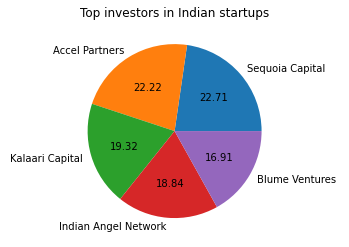

In [12]:
# correctName function to get the corrected startup name

def correctName(name):
    if (name=="Ola" or name=="Ola Cabs" or name=="Olacabs"):
        return "Ola"
    elif (name=="Flipkart" or name=="Flipkart.com"):
        return "Flipkart"
    elif (name=="Oyo Rooms" or name=="OyoRooms" or name=="Oyo" or name=="Oyorooms" or name=="OYO Rooms"):
        return "Oyo"
    elif (name=="Paytm" or name=="Paytm Marketplace"):
        return "Paytm"
    else:
        return name    

# getInvestorNameAndRefinedCount(multiple investments by a particular investor on the same startup considered once) 
# function which returns a tuple with the unique investors and their investment count arrays

def getInvestorNameAndRefinedCount():
    investor_vs_count={}
    nameHasCome=set()
    
    for i in range(df_investors.shape[0]):        
        names=df_investors.iloc[i]
    
        if ("undisclosed" in names or "Undisclosed" in names):
            continue
            
        names=names.split(",")
        startup_name=df_startup_name.iloc[i]                  
        
        for name in names:                             
            name=name.lstrip()
            name=name.rstrip()             
            
            if name=="":
                continue
                
            if name in nameHasCome:
                investor_vs_count[name].add(startup_name)
            else:
                investor_vs_count[name]=set()
                nameHasCome.add(name)                         
            
    investors=[]
    count=[]
    
    for i in investor_vs_count:
        investors.append(i)
        count.append(len(investor_vs_count[i]))
        
    return (np.array(investors), np.array(count))
  
# getting the dataframe
    
df=pd.read_csv("startup_funding.csv", skipinitialspace=True)

# getting the non nan investor names and the corrected startup names wrt the investors

df_investors=df["InvestorsName"].dropna()
df_startup_name=df["StartupName"].apply(correctName)[df_investors.index]

# getting the unique investors and their refined(multiple investments on the same startup, by same investor considered once) 
# investment count

np_investors, np_count=getInvestorNameAndRefinedCount()

# printing the top 5 investor names and investment count, in descending order wrt the investment count

sort_order=(np.argsort(np_count)[::-1])

for i in range(5):        
    index=sort_order[i]
    
    print(np_investors[index], np_count[index])
    
# plotting and showing a pie chart wrt the number of times a particular investor has funded a startup(multiple fundings to 
# the same startup by a particular investor considered once)
    
plt.axis("equal")
plt.title("Top investors in Indian startups")
    
plt.pie(np_count[sort_order][:5], labels=np_investors[sort_order][:5], autopct="%.2f")
plt.show()

If we conside the number of unique startups an investor has invested in then also Sequoia Capital will be the best choice and it has the largest percentage(among the top 5 investors)

#### Ans 4- Top investors in Indian startups(investment type- Crowd/Seed Funding)

Indian Angel Network 32
Rajan Anandan 22
LetsVenture 15
Anupam Mittal 15
Group of Angel Investors 13


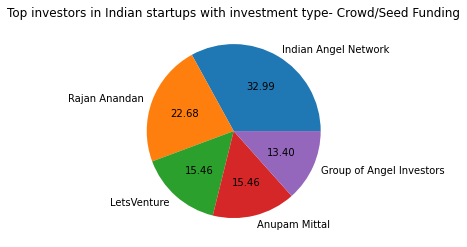

In [15]:
# getInvestment function to get the corrected investment type

def getInvestment(str):
    if "Private" in str:
        return "Private Equity"
    elif "Seed" in str:
        return "Seed Funding"
    elif "Debt" in str:
        return "Debt Funding"
    else:
        return "Crowd Funding"

# correctName function to get the corrected startup name

def correctName(name):
    if (name=="Ola" or name=="Ola Cabs" or name=="Olacabs"):
        return "Ola"
    elif (name=="Flipkart" or name=="Flipkart.com"):
        return "Flipkart"
    elif (name=="Oyo Rooms" or name=="OyoRooms" or name=="Oyo" or name=="Oyorooms" or name=="OYO Rooms"):
        return "Oyo"
    elif (name=="Paytm" or name=="Paytm Marketplace"):
        return "Paytm"
    else:
        return name 
    
# getInvestorNameAndCount function which returns a tuple with the unique investors and their investment count arrays(where 
# investment type is Crowd or Seed Funding)
    
def getInvestorNameAndCount():
    investor_vs_count={}
    nameHasCome=set()
    
    for i in range(df_investors.shape[0]):        
        names=df_investors.iloc[i]
        
        if (type(names)==float):
            continue
        
        investment_type=df_investment.iloc[i]        
        
        if (("undisclosed" in names or "Undisclosed" in names) or (investment_type!="Crowd Funding" and investment_type!="Seed Funding")):
            continue
            
        names=names.split(",")  
        startup_name=df_startup_name.iloc[i]   
        
        for name in names:                 
            name=name.lstrip()
            name=name.rstrip()     
            
            if name=="":
                continue
                
            if name in nameHasCome:
                investor_vs_count[name].add(startup_name)
            else:
                investor_vs_count[name]=set()
                nameHasCome.add(name)  
            
    investors=[]
    count=[]
    
    for i in investor_vs_count:
        investors.append(i)
        count.append(len(investor_vs_count[i]))
        
    return (np.array(investors), np.array(count))

# getting the dataframe

df=pd.read_csv("startup_funding.csv", skipinitialspace=True)

# getting the correct non nan investment types, the corresponding investors and corrected startup names

df_investment=df["InvestmentType"].dropna().apply(getInvestment)
df_investors=df["InvestorsName"][df_investment.index]
df_startup_name=df["StartupName"].apply(correctName)[df_investment.index]

# getting the unique investors and their investment count

np_investors, np_count=getInvestorNameAndCount()

# printing the investors and the investment count, in descending order wrt the investment count

sort_order=(np.argsort(np_count))[::-1]

for i in range(5):
    index=sort_order[i]
    
    print(np_investors[index], np_count[index])
    
# plotting and showing a pie chart wrt the number of times a particular investor has made an investment of the type Crowd 
# or Seed funding
    
plt.axis("equal")
plt.title("Top investors in Indian startups with investment type- Crowd/Seed Funding")

plt.pie(np_count[sort_order][:5], labels=np_investors[sort_order][:5], autopct="%.2f")
plt.show()


Since the friend's startup is at an early state and needs Crowd or Seed Funding, therfore Indian Angel Network will be the best choice as it has the largest percentage(among the top 5 investors)

#### Ans 5- Top investors in Indian startups(investment type- Private Equity)

Sequoia Capital 45
Accel Partners 42
Kalaari Capital 34
Blume Ventures 26
SAIF Partners 24


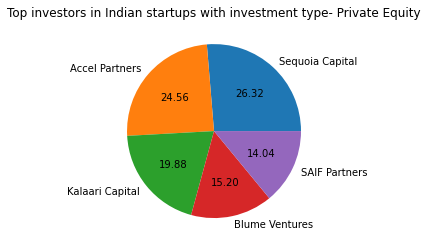

In [16]:
# getInvestment function to get the corrected investment type

def getInvestment(str):
    if "Private" in str:
        return "Private Equity"
    elif "Seed" in str:
        return "Seed Funding"
    elif "Debt" in str:
        return "Debt Funding"
    else:
        return "Crowd Funding"

# correctName function to get the corrected startup name

def correctName(name):
    if (name=="Ola" or name=="Ola Cabs" or name=="Olacabs"):
        return "Ola"
    elif (name=="Flipkart" or name=="Flipkart.com"):
        return "Flipkart"
    elif (name=="Oyo Rooms" or name=="OyoRooms" or name=="Oyo" or name=="Oyorooms" or name=="OYO Rooms"):
        return "Oyo"
    elif (name=="Paytm" or name=="Paytm Marketplace"):
        return "Paytm"
    else:
        return name 
    
# getInvestorNameAndCount function which returns a tuple with the unique investors and their investment count arrays(where 
# investment type is Private Equity)
    
def getInvestorNameAndCount():
    investor_vs_count={}
    nameHasCome=set()
    
    for i in range(df_investors.shape[0]):        
        names=df_investors.iloc[i]
        
        if (type(names)==float):
            continue
        
        investment_type=df_investment.iloc[i]        
        
        if (("undisclosed" in names or "Undisclosed" in names) or (investment_type!="Private Equity")):
            continue
            
        names=names.split(",")  
        startup_name=df_startup_name.iloc[i]   
        
        for name in names:                 
            name=name.lstrip()
            name=name.rstrip()     
            
            if name=="":
                continue
                
            if name in nameHasCome:
                investor_vs_count[name].add(startup_name)
            else:
                investor_vs_count[name]=set()
                nameHasCome.add(name)  
            
    investors=[]
    count=[]
    
    for i in investor_vs_count:
        investors.append(i)
        count.append(len(investor_vs_count[i]))
        
    return (np.array(investors), np.array(count))

# getting the dataframe

df=pd.read_csv("startup_funding.csv", skipinitialspace=True)

# getting the correct non nan investment types, the corresponding investors and corrected startup names

df_investment=df["InvestmentType"].dropna().apply(getInvestment)
df_investors=df["InvestorsName"][df_investment.index]
df_startup_name=df["StartupName"].apply(correctName)[df_investment.index]

# getting the unique investors and their investment count

np_investors, np_count=getInvestorNameAndCount()

# printing the investors and the investment count, in descending order wrt the investment count

sort_order=(np.argsort(np_count))[::-1]

for i in range(5):
    index=sort_order[i]
    
    print(np_investors[index], np_count[index])
    
# plotting and showing a pie chart wrt the number of times a particular investor has made an investment of the type Private 
# Equity
    
plt.axis("equal")
plt.title("Top investors in Indian startups with investment type- Private Equity")

plt.pie(np_count[sort_order][:5], labels=np_investors[sort_order][:5], autopct="%.2f")
plt.show()


Since the friend's startup is at the growth state and needs Private Equity, therfore Sequioa Capital will be the best choice as it has the largest percentage(among the top 5 investors)